<a href="https://colab.research.google.com/github/nhinguyen-lab/dataproject/blob/main/App_User_Segmentation_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Data Projects Stuff/userbehaviour.csv')


userid: The identity number of the user;

Average Screen Time: The average screen time of the user on the application;

Average Spent on App (INR): The average amount spent by the user on the application;

Left Review: Did the user leave any reviews about the experience on the application? (1 if true, otherwise 0)

Ratings: Ratings given by the user to the application;

New Password Request: The number of times the user requested a new password;

Last Visited Minutes: Minuted passed by when the user was last active;

Status: Installed if the application is installed and uninstalled if the user has deleted the application;


In [ ]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


# Dataframe overview


In [ ]:
#1. check NA values
df.isna().sum()

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [ ]:
#2. check duplicate
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [ ]:
df['userid'].nunique()

999

In [ ]:
df.groupby('Left Review')['userid'].nunique() # 502 didnt leave any reviews, 497 users left reviews

Left Review
0    502
1    497
Name: userid, dtype: int64

In [ ]:
df['Ratings'].value_counts().reset_index()

,index,Ratings
0,9,142
1,5,141
2,10,137
3,7,136
4,8,133
5,6,131
6,2,42
7,0,38
8,4,35
9,3,32


<Axes: xlabel='Ratings', ylabel='Count'>

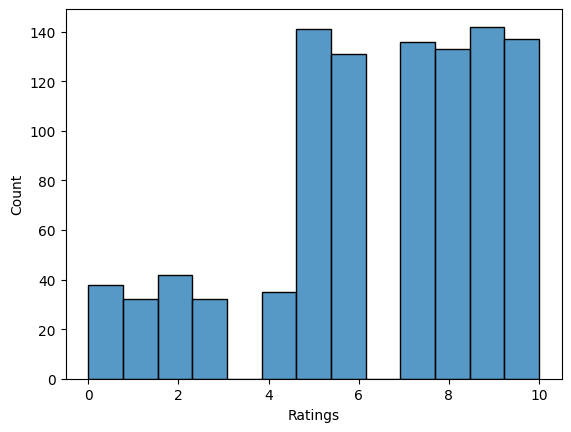

In [ ]:
sns.histplot( data = df ,
            x ='Ratings')

In [ ]:
print(f'Average Screen Time = {df["Average Screen Time"].mean()}')
print(f'Lowest Screen Time = {df["Average Screen Time"].min()}')
print(f'Highest Screen Time = {df["Average Screen Time"].max()}')

Average Screen Time = 24.39039039039039
Lowest Screen Time = 0.0
Highest Screen Time = 50.0


In [ ]:
print(f'Average Time Spent= {df["Average Spent on App (INR)"].mean()}')
print(f'Lowest Time Spent = {df["Average Spent on App (INR)"].min()}')
print(f'Highest Time Spent = {df["Average Spent on App (INR)"].max()}')

Average Time Spent= 424.4154154154154
Lowest Time Spent = 0.0
Highest Time Spent = 998.0


<ipython-input-26-1f8db7c938a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

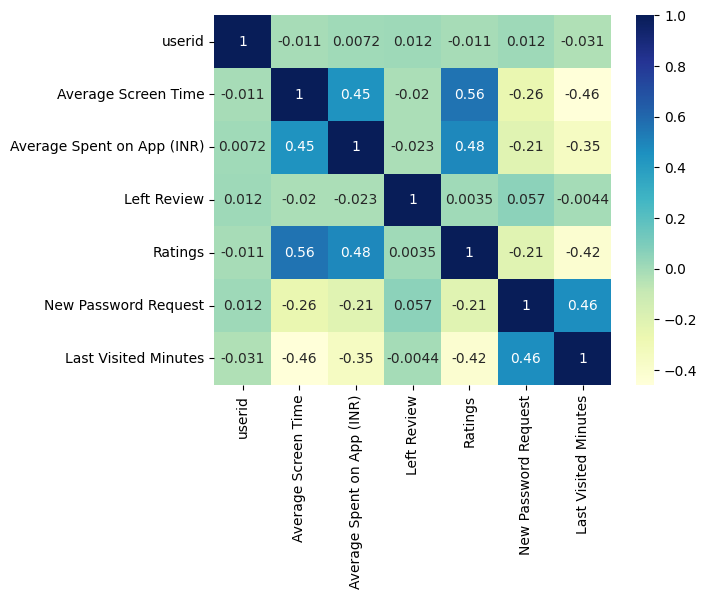

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Average Time Spent on App - high correlated to Average Screen Time : 0.45
Ratings - high correlated to Average Screen Time : 0.56 -> the higher the average screentime the higher the ratings


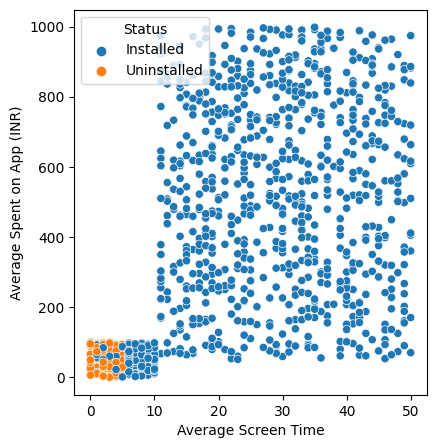

In [ ]:
#Plotting Scatter plot for correlation : average screen time vs. average spent on app
plt.figure(figsize=(10,5))
plt.subplot (121)

sns.scatterplot(data = df,
                x='Average Screen Time',
                y='Average Spent on App (INR)',
                hue = 'Status')

plt.show()

In [ ]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


# App User Segmentation

In [ ]:
clustering_data = df[["Average Screen Time", "Left Review",
                        "Ratings", "Last Visited Minutes",
                        "Average Spent on App (INR)",
                        "New Password Request"]]

from sklearn.preprocessing import MinMaxScaler
for i in clustering_data.columns:
    MinMaxScaler(i)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(clustering_data)
df["Segments"] = clusters

print(df.head(10))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   
5    1006                 28.0                       599.0            0   
6    1007                 49.0                       887.0            1   
7    1008                  8.0                        31.0            0   
8    1009                 28.0                       741.0            1   
9    1010                 28.0                       524.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  Segments  
0        9                     7                  2990    Installed         0  
1        4    

In [ ]:
df['Segments'].value_counts()

0    910
1     45
2     44
Name: Segments, dtype: int64

In [ ]:
df['Segments'] = df['Segments'].map({0: 'Retained',
                                     1: 'Churn',
                                     2: 'Need Attention'})
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990,Installed,Retained
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,Need Attention
2,1003,37.0,207.0,0,8,5,971,Installed,Retained
3,1004,32.0,445.0,1,6,2,799,Installed,Retained
4,1005,45.0,427.0,1,5,6,3668,Installed,Retained


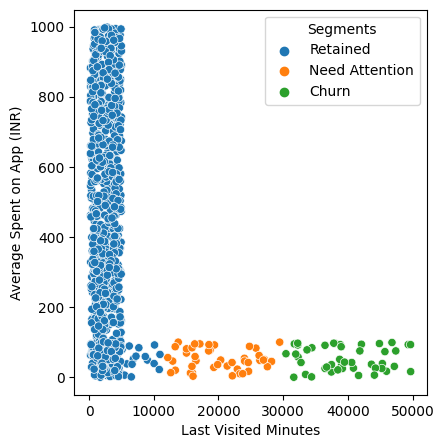

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot (121)

sns.scatterplot(data = df,
                x='Last Visited Minutes',
                y='Average Spent on App (INR)',
                hue = 'Segments')

plt.show()

The blue segment shows the segment of users the app has retained over time. The orangge segment indicates the segment of users who just uninstalled the app or are about to uninstall it soon. And the green segment indicates the segment of users that the application has lost